In [9]:
#%% imports package modules
# from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from deltasigma import synthesizeNTF, simulateDSM, ds_hann, calculateSNR, evalTF
from deltasigma import dbv, figureMagic, dbp

In [10]:
#%% 
ORDER = 6
OSR = 16
FC = 0.5
h0p5 = synthesizeNTF(order=ORDER, osr=OSR, opt=0, H_inf=1.5, f0=FC)
print(h0p5)

(array([-1. +1.22464680e-16j, -1. -1.22464680e-16j, -1. +1.22464680e-16j,
       -1. -1.22464680e-16j, -1. +1.22464680e-16j, -1. -1.22464680e-16j]), array([-0.92748403-0.19078173j, -0.92748403+0.19078173j,
       -0.85250265-0.1271324j , -0.85250265+0.1271324j ,
       -0.81563827-0.04409996j, -0.81563827+0.04409996j]), 1)


In [11]:
#%%
NS = 8192
FB = int(np.ceil(NS / (2. * OSR)))
# ftest = np.floor(2. / 3. * FB)  #for LPF_DSM
ftest = NS//4 - np.floor(1. / 8. * FB) #for HPF_DSM
input_cos = 0.5 * np.sin(2 * np.pi * ftest * np.arange(NS) / NS)
output_DSM, xn, xmax, y = simulateDSM(input_cos, h0p5)
t = np.arange(301)

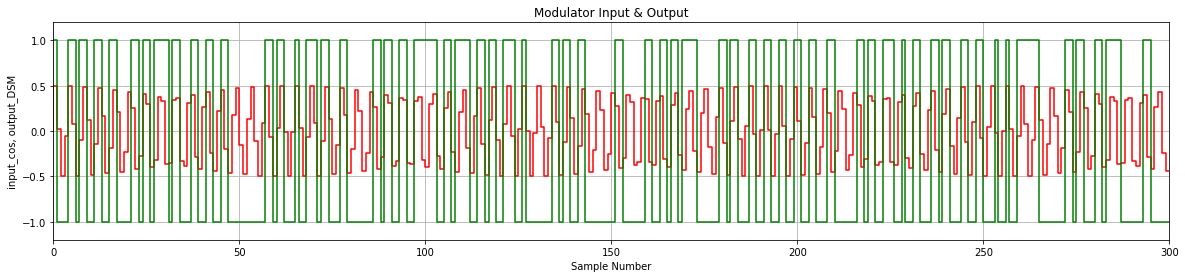

In [12]:
#%%
plt.figure(figsize=(20, 4))
plt.step(t, input_cos[t], 'r')
plt.step(t, output_DSM[t], 'g')
plt.axis([0, 300, -1.2, 1.2])
plt.xlabel('Sample Number')
plt.ylabel('input_cos, output_DSM')
plt.title('Modulator Input & Output')
plt.grid(True)
plt.show()
# plt.hold(True)

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


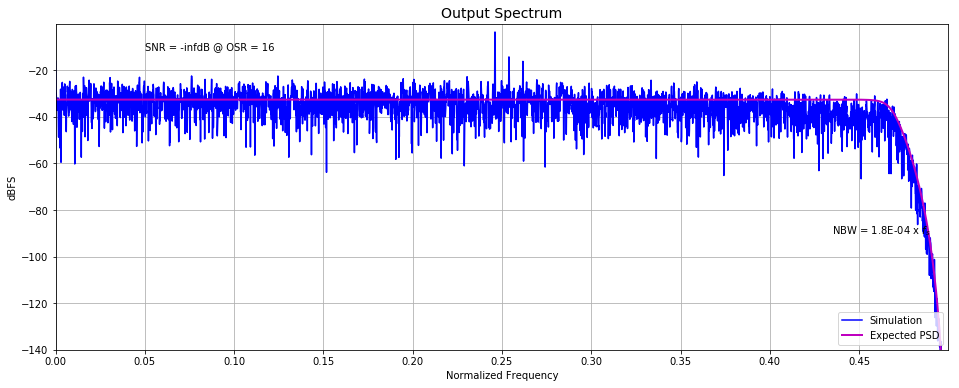

In [13]:
#%%
f = np.linspace(0, 0.5, NS / 2. + 1)
spec = np.fft.fft(output_DSM * ds_hann(NS)) / (NS / 4)
plt.plot(f, dbv(spec[:int(NS / 2. + 1)]), 'b', label='Simulation')
figureMagic([0, 0.5], 0.05, None, [-140, 0], 20,
            None, (16, 6), 'Output Spectrum')
plt.xlabel('Normalized Frequency')
plt.ylabel('dBFS')
snr = calculateSNR(spec[2:FB + 1], ftest - 2) #for LPF_DSM
plt.text(0.05, -10, 'SNR = %4.1fdB @ OSR = %d' %
         (snr, OSR), verticalalignment='center')
NBW = 1.5 / NS
Sqq = 4 * evalTF(h0p5, np.exp(2j * np.pi * f)) ** 2 / 3.
plt.plot(f, dbp(Sqq * NBW), 'm', linewidth=2, label='Expected PSD')
plt.text(0.49, -90, 'NBW = %4.1E x $f_s$' % NBW, horizontalalignment='right')
plt.legend(loc=4)
plt.show()

In [ ]:
#%% output data to files
np.savetxt('DacDsmOut.txt', output_DSM, fmt='%d')